<a href="https://colab.research.google.com/github/SimpleVlad/FirstAutoEncoder/blob/master/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Flatten, Reshape
from keras.models import Model

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test  = x_test .astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test  = np.reshape(x_test,  (len(x_test),  28, 28, 1))



Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


In [0]:


def create_dense_ae():
    # Размерность кодированного представления
    encoding_dim = 49

    # Энкодер
    # Входной плейсхолдер
    input_img = Input(shape=(28, 28, 1)) # 28, 28, 1 - размерности строк, столбцов, фильтров одной картинки, без батч-размерности
    # Вспомогательный слой решейпинга
    flat_img = Flatten()(input_img)
    # Кодированное полносвязным слоем представление
    encoded = Dense(encoding_dim, activation='relu')(flat_img)
    
    # Декодер
    # Раскодированное другим полносвязным слоем изображение
    input_encoded = Input(shape=(encoding_dim,))
    flat_decoded = Dense(28*28, activation='sigmoid')(input_encoded)
    decoded = Reshape((28, 28, 1))(flat_decoded)

    # Модели, в конструктор первым аргументом передаются входные слои, а вторым выходные слои
    # Другие модели можно так же использовать как и слои
    encoder = Model(input_img, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    return encoder, decoder, autoencoder

In [4]:
encoder, decoder, autoencoder = create_dense_ae()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
encoder (Model)              (None, 49)                38465     
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         39200     
Total params: 77,665
Trainable params: 77,665
Non-trainable params: 0
_________________________________________________________________


In [11]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 4s 62us/step - loss: 0.0823 - val_loss: 0.0809
Epoch 2/40
60000/60000 [==============================] - 4s 62us/step - loss: 0.0815 - val_loss: 0.0802
Epoch 3/40
60000/60000 [==============================] - 4s 63us/step - loss: 0.0810 - val_loss: 0.0799
Epoch 4/40
60000/60000 [==============================] - 4s 63us/step - loss: 0.0806 - val_loss: 0.0795
Epoch 5/40
60000/60000 [==============================] - 4s 62us/step - loss: 0.0803 - val_loss: 0.0793
Epoch 6/40
60000/60000 [==============================] - 4s 63us/step - loss: 0.0801 - val_loss: 0.0792
Epoch 7/40
60000/60000 [==============================] - 4s 63us/step - loss: 0.0799 - val_loss: 0.0790
Epoch 8/40
60000/60000 [==============================] - 4s 62us/step - loss: 0.0797 - val_loss: 0.0788
Epoch 9/40
60000/60000 [==============================] - 4s 61us/step - loss: 0.0796 - val_loss: 0.0787
Epoch

In [0]:


def plot_digits(*args):
    args = [x.squeeze() for x in args]
    n = min([x.shape[0] for x in args])
    
    plt.figure(figsize=(2*n, 2*len(args)))
    for j in range(n):
        for i in range(len(args)):
            ax = plt.subplot(len(args), n, i*n + j + 1)
            plt.imshow(args[i][j])
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

    plt.show()

In [14]:
n = 10

imgs = x_test[:n]
encoded_imgs = encoder.predict(imgs, batch_size=n)
encoded_imgs[0]

array([ 8.884248 ,  7.062192 ,  8.039506 ,  7.383704 ,  3.5581586,
        1.5543332,  4.762117 ,  3.5119479, 11.142338 ,  5.205528 ,
        2.0112247,  5.2743173,  5.3490095,  4.880188 ,  7.2230525,
        5.867038 ,  6.7410636,  6.290064 ,  8.658377 ,  3.5675933,
        2.8210938,  9.124893 ,  7.152712 ,  1.6849092,  6.993626 ,
        7.4024124,  7.1836433,  4.992969 , 10.099931 ,  7.2811747,
        3.9440553, 10.689108 ,  9.6983385,  4.6736536,  6.8394485,
        5.7777977, 14.4377575,  5.5323777,  4.232252 ,  1.9654057,
        9.963948 ,  7.5709696,  4.124878 ,  4.6486187, 16.026306 ,
        4.8997884,  1.9925625,  8.998664 ,  5.0837984], dtype=float32)

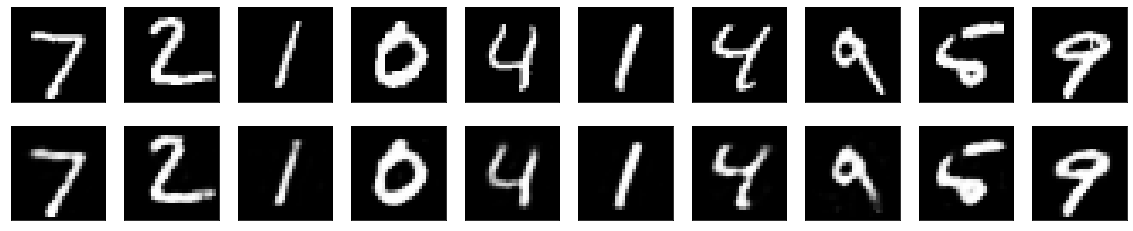

In [15]:
decoded_imgs = decoder.predict(encoded_imgs, batch_size=n)

plot_digits(imgs, decoded_imgs)